<center><h2 style='color:red'>Titanic: Simple Models For Beginners With EDA</h2></center>

* **1- Introduction**
* **2- Data Preparation**
* **3- Data Visualization**
* **4- Preprocessing data for machine learning**
* **5- Machine Learning**
    * 5.1 Tree Based Models
    * 5.2 Classic ML Models
* **6- Submitting**
    * 6.1 Ensemble
<hr>

**Introduction**<br>
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.<br><br>
**Goal**
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Data Preparation

In [1]:
# Disabling warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import Main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Visualization lib.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# processing
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

In [3]:
import os
print(os.listdir('../input'))

['train.csv', 'test.csv', 'gender_submission.csv']


In [4]:
# set our Dataframe
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/gender_submission.csv')

In [5]:
# Show first 5 rows of train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# data size
print("Train Data Size: ", train_df.shape)
print("Test Data Size:  ", test_df.shape)

Train Data Size:  (891, 12)
Test Data Size:   (418, 11)


In [7]:
# Show if any NAN data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1- Thier is more NAN value in "Cabin", "Age" columns.
2- we did not need "PassengerId" columns.

So we need to fix that

Fix Data using 3 various methods. 

SimpleImputer is sklearn library for Imputation of missing values
You Can find all of them here:
[impute univariate feature imputation](https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation)

In [9]:
imputer = SimpleImputer(np.nan, "mean")

train_df['Age'] = imputer.fit_transform(np.array(train_df['Age']).reshape(891, 1)) # 1st
train_df.Embarked.fillna(method='ffill', inplace=True) # 2nd
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True) # 3rd

test_df['Age'] = imputer.fit_transform(np.array(test_df['Age']).reshape(418, 1))
test_df.Embarked.fillna(method='ffill', inplace=True)
test_df.Fare.fillna(method='ffill', inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

# Data Visualization

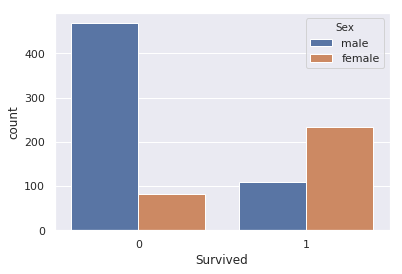

In [10]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

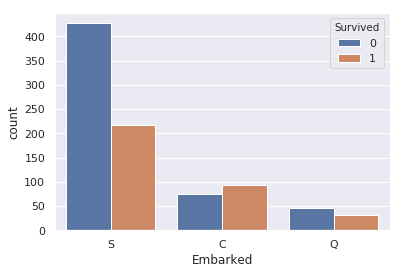

In [11]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

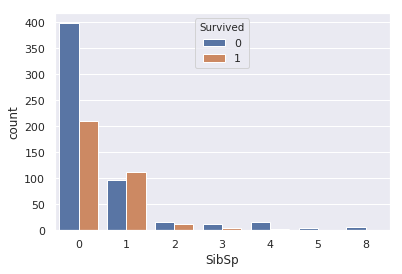

In [12]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)

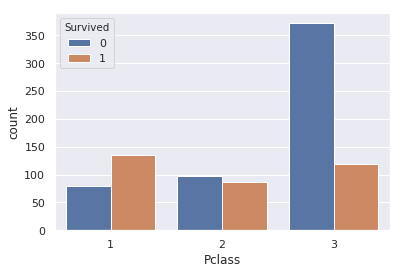

In [13]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

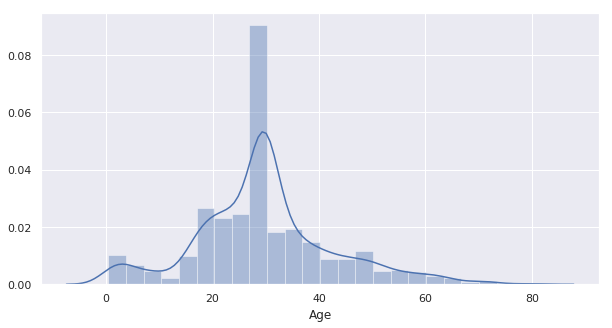

In [14]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['Age'], bins=24, color='b')

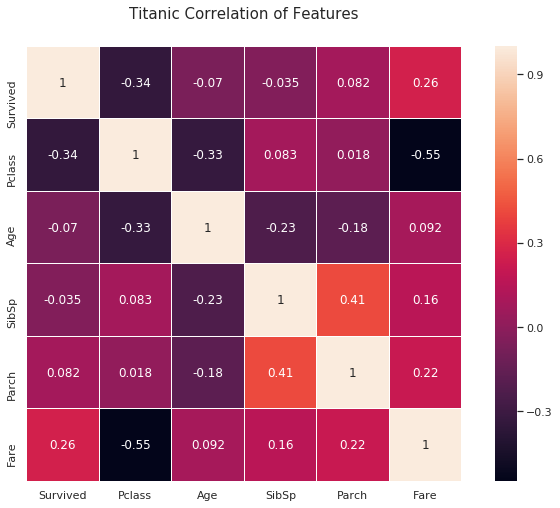

In [15]:
plt.figure(figsize=(12, 8))
plt.title('Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True);

# Preprocessing data for machine learning

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


As you see 3 columns have "object" data type. So we must convert it to numbers.

In [17]:
objects_cols = train_df.select_dtypes("object").columns
objects_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

Encode target labels with value between 0 and (n_classes - 1).

In [18]:
le = LabelEncoder()
train_df[objects_cols] = train_df[objects_cols].apply(le.fit_transform)
test_df[objects_cols] = test_df[objects_cols].apply(le.fit_transform)
train_df[objects_cols].head()

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2


In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


In [20]:
# model selection
from sklearn.model_selection import train_test_split, cross_val_score

# normaliztion
from sklearn.preprocessing import StandardScaler

# tree based models
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier

# classic ml models
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

# metrics
from sklearn.metrics import accuracy_score

In [21]:
# Machine Learning 
X = train_df.drop(['Survived'], 1).values
y = train_df['Survived'].values

### Normalization

**StandardScaler: Standardize features by removing the mean and scaling to unit variance.**

In [22]:
scale = StandardScaler()
scale.fit(X)

# transform data
X = scale.transform(X)

# Machine Learing

In [23]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**Class Model Idea from "Heart Disease - Classifications" kernel here:
[Heart Disease - Classifications](https://www.kaggle.com/elcaiseri/heart-disease-classifications)**

In [24]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(X_train, y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)

### Tree Based Models

In [25]:
xgb = XGBClassifier(random_state=42, n_estimators=222)
xgb = Model(xgb)

xgb.cross_validation()

Training XGBClassifier Model...
Model Trained.
Evaluate XGBClassifier score by cross-validation...
[0.81564246 0.81005587 0.84831461 0.83707865 0.85875706]
Mean accuracy of cross-validation:  0.8339697289192409


In [26]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8379888268156425


In [27]:
rfc = RandomForestClassifier(random_state=42)
rfc = Model(rfc)

rfc.cross_validation()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.80446927 0.82122905 0.85955056 0.80898876 0.86440678]
Mean accuracy of cross-validation:  0.8317288859052121


In [28]:
rfc.accuracy()

RandomForestClassifier Model Accuracy:  0.8435754189944135


### Classic ML Models

In [29]:
gnb = GaussianNB()
gnb = Model(gnb)

gnb.cross_validation()

Training GaussianNB Model...
Model Trained.
Evaluate GaussianNB score by cross-validation...
[0.74301676 0.73184358 0.78089888 0.80337079 0.80225989]
Mean accuracy of cross-validation:  0.7722779770245057


In [30]:
gnb.accuracy()

GaussianNB Model Accuracy:  0.770949720670391


In [31]:
svc = SVC(C=0.4, random_state=42, probability=True)
svc = Model(svc)

svc.cross_validation()

Training SVC Model...
Model Trained.
Evaluate SVC score by cross-validation...
[0.83240223 0.82122905 0.81460674 0.80898876 0.84180791]
Mean accuracy of cross-validation:  0.8238069400277397


In [32]:
svc.accuracy()

SVC Model Accuracy:  0.8156424581005587


# Submitting

In [33]:
# Predict our test file
test_df.head()

# normalize testset
test_X = scale.transform(test_df.values)

In [34]:
xgb_pred = xgb.prediction(test_x=test_X, test=True)
gnb_pred = gnb.prediction(test_x=test_X, test=True)
svc_pred = svc.prediction(test_x=test_X, test=True)
rfc_pred = rfc.prediction(test_x=test_X, test=True)

In [35]:
sub['Survived'] = xgb_pred # Best solo Submission (Top 5% LB)
sub.to_csv('xgb_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [36]:
sub['Survived'] = rfc_pred
sub.to_csv('rfc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,1
8,900,1
9,901,0


In [37]:
sub['Survived'] = gnb_pred
sub.to_csv('gnb_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [38]:
sub['Survived'] = svc_pred
sub.to_csv('svc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


### Ensemble Submitions

In [39]:
# predict probability for each model
xgb_preds = xgb.model.predict_proba(test_X)
rfc_preds = rfc.model.predict_proba(test_X)
gnb_preds = gnb.model.predict_proba(test_X)
svc_preds = svc.model.predict_proba(test_X)

# ensemble all models
preds = (xgb_preds + rfc_preds + gnb_preds + svc_preds) / 4

In [40]:
sub['Survived'] = preds.argmax(axis=1)
sub.to_csv('submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


<h3>Thanks For Being Here.  <span style='color:red'>UPVOTE</span>  If Interested.. Feel Free In Comments</h3>